**Table of Contents** <br>

* [1.Import Libraries](#importlibraries)
* [2.Import Dataset](#importdataset)
* [3.Initial Analysis](#initialanalysis)
* [4. Data Pre-Processing](#datapreprocessing)
    * [4.1 Data Partition](#datapartition)
    * [4.2 Missing Values](#missingvalues)

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [1]:
#!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#data partition
from sklearn.model_selection import train_test_split

#empty values
#import missingno as msno
#from sklearn.impute import KNNImputer

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

#
from math import ceil

#scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder,  OrdinalEncoder

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, cross_val_score
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

from sklearn.impute import KNNImputer

In [3]:
#First Hearing Date: blank means no hearing yet, can we input? I think not
#Agreement Reached: Can't input
#WCB Decision: Can't input

#test data don't have Agreement Reached, WCB Decision and Claim Injury Type (this one make sense)

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [4]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2467044942.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_data.csv')


<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>

In [5]:
train.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


In [6]:
test.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.00,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.00,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
5,2022-12-28,36,N,2023-01-02,N,0.00,1986.0,2023-01-02,NaN,NYC TRANSIT AUTHORITY,...,III,NaN,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,77.0,MENTAL STRESS,66.0,NO PHYSICAL INJURY,10941,4
6,2022-12-22,19,N,2023-01-02,N,688.20,2003.0,2022-12-30,NaN,"WAL-MART ASSOCIATES, INC.",...,I,NaN,56.0,LIFTING,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14131,6
7,2022-12-13,43,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,ERIE INSURANCE CO OF NY,...,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,49.0,SPRAIN OR TEAR,53.0,KNEE,13357,4
8,2022-12-28,40,N,2023-01-02,N,0.00,1982.0,2022-12-31,NaN,STARR INDEMNITY & LIABILITY CO,...,IV,NaN,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),11735,3
9,2022-11-01,48,N,2023-01-02,Y,1180.74,1974.0,2023-01-02,2023-01-09,STATE INSURANCE FUND,...,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14720,0


In [7]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 33)
Test dimensions: (387975, 30)


In [8]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')
Test columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [11]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,...,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,...,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,...,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,...,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,...,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,...,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,...,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,...,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,...,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


In [12]:
test.describe(include = 'all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
count,385531,387975.000000,387975,387975,387975,3.687710e+05,368505.000000,378841,85216,387975,...,387975,0.0,377627.000000,377627,377415.000000,377415,378426.000000,378426,368633,387975.000000
unique,3438,NaN,3,434,2,NaN,NaN,1048,626,1598,...,5,NaN,NaN,74,NaN,56,NaN,51,6276,NaN
top,2024-01-16,NaN,N,2023-09-21,N,NaN,NaN,2023-10-11,2023-10-04,STATE INSURANCE FUND,...,IV,NaN,NaN,"FELLOW WORKER, PATIENT OR OTHER PERSON",NaN,STRAIN OR TEAR,NaN,MULTIPLE,11368,NaN
freq,1263,NaN,386314,1789,306476,NaN,NaN,1687,341,66189,...,182276,NaN,NaN,33293,NaN,108326,NaN,67465,2068,NaN
mean,NaN,41.414944,NaN,NaN,NaN,1.833438e+02,1875.383466,NaN,NaN,NaN,...,NaN,NaN,53.335678,NaN,38.373674,NaN,31.516109,NaN,NaN,3.000284
std,NaN,14.501056,NaN,NaN,NaN,3.542310e+03,444.659075,NaN,NaN,NaN,...,NaN,NaN,26.176833,NaN,20.966100,NaN,23.359950,NaN,NaN,1.997982
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,0.000000e+00,1967.000000,NaN,NaN,NaN,...,NaN,NaN,29.000000,NaN,10.000000,NaN,15.000000,NaN,NaN,1.000000
50%,NaN,40.000000,NaN,NaN,NaN,0.000000e+00,1980.000000,NaN,NaN,NaN,...,NaN,NaN,56.000000,NaN,43.000000,NaN,36.000000,NaN,NaN,3.000000
75%,NaN,53.000000,NaN,NaN,NaN,0.000000e+00,1992.000000,NaN,NaN,NaN,...,NaN,NaN,74.000000,NaN,52.000000,NaN,51.000000,NaN,NaN,5.000000


<hr>
<a class="anchor" id="furtheranalysis">
    
## 3.1 Further Analysis
    
</a>

In [13]:
print('youngest person:',train['Birth Year'].max())
print('oldest injured:',train['Age at Injury'].max())
print('most dependents:',train['Number of Dependents'].max())

youngest person: 2018.0
oldest injured: 117.0
most dependents: 6.0


In [14]:
for i in train.columns:
    print(i)
    print(train[i].unique())
    print(train[i].value_counts())
    print('\n')

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

<hr>
<a class="anchor" id="graphicalrepresentaion">
    
### 3.1.1 Graphical Representaion
    
</a>

In [15]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()

In [16]:
"""train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()"""

'train[numerical_cols].hist(figsize=(15, 10))\nplt.tight_layout()\nplt.show()'

In [17]:
"""plt.figure(figsize=(8, 6))
sns.countplot( x= 'Claim Injury Type Num', data = train)
plt.title('Distribution of Claim Injury Type Num')
plt.show()"""

"plt.figure(figsize=(8, 6))\nsns.countplot( x= 'Claim Injury Type Num', data = train)\nplt.title('Distribution of Claim Injury Type Num')\nplt.show()"

In [18]:
"""for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()"""

"for col in categorical_cols:\n    plt.figure(figsize=(10, 5))\n    sns.countplot(data=train, x=col, order=train[col].value_counts().index)\n    plt.xticks(rotation=90)\n    plt.title(f'Distribution of {col}')\n    plt.show()"

In [19]:
"""corr_matrix = train[numerical_cols + ['Claim Injury Type Num']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show("""

'corr_matrix = train[numerical_cols + [\'Claim Injury Type Num\']].corr()\n\nplt.figure(figsize=(12, 8))\nsns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=\'coolwarm\')\nplt.title(\'Correlation Matrix\')\nplt.show('

In [20]:
"""for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Claim Injury Type Num', y=col, data=train)
    plt.title(f'{col} vs Claim Injury Type Num')
    plt.show() """

"for col in numerical_cols:\n    plt.figure(figsize=(10, 6))\n    sns.boxplot(x='Claim Injury Type Num', y=col, data=train)\n    plt.title(f'{col} vs Claim Injury Type Num')\n    plt.show() "

<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

In [21]:
# set Claim Identifier as index
train.set_index('Claim Identifier', inplace=True) 
test.set_index('Claim Identifier', inplace=True)

<hr>
<a class="anchor" id="types">
    
## 4.1 Types
    
</a>

In [22]:
train['WCIO Part Of Body Code'] = train['WCIO Part Of Body Code'].apply(lambda x: 60 if x < 0 else x)
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].apply(lambda x: 60 if x < 0 else x)

In [23]:
# Convert:
## IN DATE
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] 
for col in date_cols:
    train[col] = pd.to_datetime(train[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')

# IN INT
int_cols = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']
for col in int_cols:
    train[col] = train[col].astype('Int64')
    test[col] = test[col].astype('Int64')

# IN OBJECT
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
train[float_to_object] = train[float_to_object].astype('object')
test[float_to_object] = test[float_to_object].astype('object')

In [24]:
# classifiy them as Non-US residents
train['Zip Code'] = train['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)
test['Zip Code'] = test['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)

In [25]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
train['Zip Code'] = np.where(
    (train['Zip Code'] != 'Unknown') & 
    (train['Zip Code'] != 'Non-US Resident') & 
    train['Zip Code'].notna() & 
    train['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (train['Zip Code'] != 'Unknown') & 
        (train['Zip Code'] != 'Non-US Resident') & 
        train['Zip Code'].notna(), 
        'non-NY US Residents', 
        train['Zip Code']
    )
)
test['Zip Code'] = np.where(
    (test['Zip Code'] != 'Unknown') & 
    (test['Zip Code'] != 'Non-US Resident') & 
    test['Zip Code'].notna() & 
    test['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (test['Zip Code'] != 'Unknown') & 
        (test['Zip Code'] != 'Non-US Resident') & 
        test['Zip Code'].notna(), 
        'non-NY US Residents', 
        test['Zip Code']
    )
)


print(train['Zip Code'].value_counts())
print() 
print('NaN:', train['Zip Code'].isna().sum())

Zip Code
NY Resident            503921
non-NY US Residents     26094
Non-US Resident         15374
Name: count, dtype: int64

NaN: 48082


<hr>
<a class="anchor" id="duplicates">
    
## 4.2 Duplicates
    
</a>

In [26]:
print(train.duplicated().sum())
print(test.duplicated().sum())

train.drop_duplicates(inplace=True)
#test.drop_duplicates(inplace=True)

print(train.duplicated().sum())
#print(test.duplicated().sum())

18355
3
0


<hr>
<a class="anchor" id="strangevalues">
    
## 4.3 Strange values
    
</a>

In [27]:
train['Age at Injury'].describe() #existem idades muito estranhas

count     574020.0
mean     42.114491
std      14.256256
min            0.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

<hr>
<a class="anchor" id="missingvalues">
    
## 4.4 Missing Values
    
</a>

In [28]:
#msno.matrix(train, labels=True, sort="descending");

In [29]:
train.isna().sum()

Accident Date                           4784
Age at Injury                           1096
Alternative Dispute Resolution          1096
Assembly Date                              0
Attorney/Representative                 1096
Average Weekly Wage                    29747
Birth Year                             30174
C-2 Date                               15655
C-3 Date                              387872
Carrier Name                            1096
Carrier Type                            1096
Claim Injury Type                       1096
County of Injury                        1096
COVID-19 Indicator                      1096
District Name                           1096
First Hearing Date                    424319
Gender                                  1096
IME-4 Count                           442313
Industry Code                          11053
Industry Code Description              11053
Medical Fee Region                      1096
OIICS Nature of Injury Description    575116
WCIO Cause

In [30]:
#msno.matrix(test, labels=True, sort="descending");

In [31]:
test.isna().sum()

Accident Date                           2444
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-2 Date                                9134
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Industry Code Description               7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause of Injury Code              10348
WCIO Cause

In [32]:
# Delete the column with all missing values
not_in_test = train[['WCB Decision', 'Agreement Reached']]
train.drop(['OIICS Nature of Injury Description', 'WCB Decision', 'Agreement Reached'], inplace=True, axis=1)
test.drop(['OIICS Nature of Injury Description'], inplace=True, axis=1)

In [33]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (575116, 29)
Test dimensions: (387975, 28)


In [34]:
# Eliminates the lines that do not have a WCB decision
train.dropna(subset=['Claim Injury Type'], inplace=True)

In [35]:
# Eliminates rows with only 1, 2 or 3 NaN values, as we see that 
# the 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing
train = train.dropna(thresh=4)
#test = test.dropna(thresh=4)

In [36]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (574020, 29)
Test dimensions: (387975, 28)


In [37]:
train.isna().sum()

Accident Date                          3688
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14559
C-3 Date                             386776
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423223
Gender                                    0
IME-4 Count                          441217
Industry Code                          9957
Industry Code Description              9957
Medical Fee Region                        0
WCIO Cause of Injury Code             15639
WCIO Cause of Injury Description

In [38]:
test.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9134
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                          7736
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code             10348
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code      

In [39]:
# median
# for metric columns
# fill with training median as it does not get influenced by extreme outliers
def NaN_median (train, test, cols):
    """
    Replace NaN values ​​with the training median in specific columns (cols is a list) of a DataFrame (df).
    """
    for col in cols:
        if pd.api.types.is_numeric_dtype(train[col]): # Numeric
            median_to_fill = train[col].median()
            train[col].fillna(median_to_fill, inplace=True)
            test[col].fillna(median_to_fill, inplace=True)
            # print(df[col].isna().sum())
            
        elif pd.api.types.is_datetime64_any_dtype(train[col]):  # Date  
            median_date_to_fill = train[col].median() 
            train[col].fillna(median_date_to_fill, inplace=True)
            test[col].fillna(median_date_to_fill, inplace=True) 
            # print(df[col].isna().sum())
            
    return train, test

In [40]:
#for non-metric columns
#replace NaN with Unknown
def NaN_Unknown(df, cols):
    """
    Replace NaN values with  'Unknown' (for object columns)
                              0 (for numeric columns) 
                             '1900-01-01'(generic date, for date columns)
    in specific columns (cols is a list) of a DataFrame (df).
    This function skips columns of type datetime.
    """
    for col in cols:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
            # print(df[col].isna().sum())
       
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0)
            # print(df[col].isna().sum())
        
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(pd.to_datetime('1900-01-01'))
            # print(df[col].isna().sum())
            
    return df

<hr>
<a class="anchor" id="accidentdate">
    
### 4.4.1 Accident Date
    
</a>
Replace NaN values with the median

In [41]:
NaN_median(train, test, ['Accident Date'])

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_date_to_fill, inplace=True)
C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="averageweeklywage">
    
### 4.4.2 Average Weekly Wage 
    
</a> 
Replace NaN values with the median 

In [42]:
NaN_median(train, test, ['Average Weekly Wage'])

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_to_fill, inplace=True)
C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="birthyear">
    
### 4.4.3 Birth Year 
    
</a>   

In [43]:
# Replace 0 values ​​with NaN
train['Birth Year'].replace(0, np.nan, inplace=True)
test['Birth Year'].replace(0, np.nan, inplace=True)

# Replace NaN values with subtracting the Accident Year by the Age at Injury 
train['Accident Year'] = train['Accident Date'].dt.year
train['Birth_Year_2'] = train['Accident Year'] - train['Age at Injury']
train['Birth Year'] = train['Birth Year'].fillna(train['Birth_Year_2'])

test['Accident Year'] = test['Accident Date'].dt.year
test['Birth_Year_2'] = test['Accident Year'] - test['Age at Injury']
test['Birth Year'] = test['Birth Year'].fillna(test['Birth_Year_2'])

#print(train['Birth Year'].isna().sum())
#print(test['Birth Year'].isna().sum())

# The rest of the missing values ​​were filled in with the median
NaN_median(train, test, ['Birth Year'])

#print(train['Birth Year'].isna().sum())
#print(test['Birth Year'].isna().sum())

train.drop(columns=['Accident Year', 'Birth_Year_2'], inplace=True)
test.drop(columns=['Accident Year', 'Birth_Year_2'], inplace=True)

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\1592240652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Birth Year'].replace(0, np.nan, inplace=True)
C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\1592240652.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

<hr>
<a class="anchor" id="C-2Date">
    
### 4.4.4 C-2 Date
    
</a>   
Replace NaN values with the median  

In [44]:
NaN_median(train, test, ['C-2 Date'])

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_date_to_fill, inplace=True)
C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="C-3Date">
    
### 4.4.5 C-3 Date
    
</a>   
Dropped the column   

#Replace NaN values with generic date, '1900-01-01' 
#substituir por uma data generica ou eliminar coluna

In [45]:
#train.drop(columns=['C-3 Date'], inplace=True)
#test.drop(columns=['C-3 Date'], inplace=True)

NaN_median(train, test, ['C-3 Date'])

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_date_to_fill, inplace=True)
C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="firsthearingdate">
    
### 4.4.6 First Hearing Date 
    
</a>     
A blank date means the claim has not yet had a hearing held  
(acho que devia ficar NaN)

In [46]:
# train['First Hearing Date'] = train['First Hearing Date'].fillna('No Hearing Set')

#Rafa
NaN_median(train, test, ['First Hearing Date'])

C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_date_to_fill, inplace=True)
C:\Users\lopes\AppData\Local\Temp\ipykernel_18040\2607602052.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="IME-4Count">
    
### 4.4.7 IME-4 Count
    
</a>        
Replace NaN values with 0, because if it doesn't have a value it's because they haven't carried out any independent medical examination yet

In [47]:
train['IME-4 Count'] = train['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

<hr>
<a class="anchor" id="zipcode">
    
### 4.4.8 Zip Code
    
</a>  

In [48]:
# Replace NaN values with the mode
train['Zip Code'] = train['Zip Code'].fillna('NY Resident')
test['Zip Code'] = test['Zip Code'].fillna('NY Resident')

<hr>
<a class="anchor" id="defaultvalue">
    
### 4.4.9 Replacing NaN with a default value
    
</a>  

+ Industry Code (Industry Code Description)
+ WCIO Cause of Injury Code (WCIO Cause of Injury Description)
+ WCIO Nature of Injury Code (WCIO Nature of Injury Description)
+ WCIO Part Of Body Code (WCIO Part Of Body Description)

In [49]:
# No information about the injury
filtered_df = train[train[['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code']].isna().all(axis=1)]
print(len(filtered_df))

train = train.drop(filtered_df.index)

15593


In [50]:
missing_columns = train.columns[train.isna().any()].tolist()
NaN_Unknown(train, missing_columns)
NaN_Unknown(test, missing_columns)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,0.0,2003,2023-01-02,2021-07-21,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,NY Resident,1
6166141,2022-11-20,19,N,2023-01-02,N,0.0,2003,2023-01-02,2021-07-21,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,NY Resident,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,2021-07-21,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,NY Resident,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,1967,2023-01-02,2021-07-21,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,NY Resident,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,2021-07-21,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,NY Resident,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,0.0,1960,2012-10-23,2021-07-21,STATE INSURANCE FUND,...,Unknown,I,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NY Resident,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,2021-08-09,2024-05-28,NYC TRANSIT AUTHORITY,...,Unknown,IV,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NY Resident,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,2021-08-09,2021-07-21,STATE INSURANCE FUND,...,Unknown,IV,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NY Resident,5


In [51]:
train.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
Claim Injury Type                    0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code   

In [52]:
test.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

In [53]:
#msno.matrix(train, labels=True, sort="descending");

In [54]:
#msno.matrix(test, labels=True, sort="descending");

In [55]:
#######################################################

In [56]:
# Extrair características das datas
for col in date_cols:
    train[col + '_dayofweek'] = train[col].dt.dayofweek
    train[col + '_month'] = train[col].dt.month
    train[col + '_year'] = train[col].dt.year

    test[col + '_dayofweek'] = test[col].dt.dayofweek
    test[col + '_month'] = test[col].dt.month
    test[col + '_year'] = test[col].dt.year

# Remover as colunas de data originais se não forem mais necessárias
train.drop(columns=date_cols, inplace=True)
test.drop(columns=date_cols, inplace=True)

## Outliers

In [57]:
numeric_cols = train[['Age at Injury',
                      'Average Weekly Wage',
                      'Birth Year',
                      'IME-4 Count',
                      'Number of Dependents']]

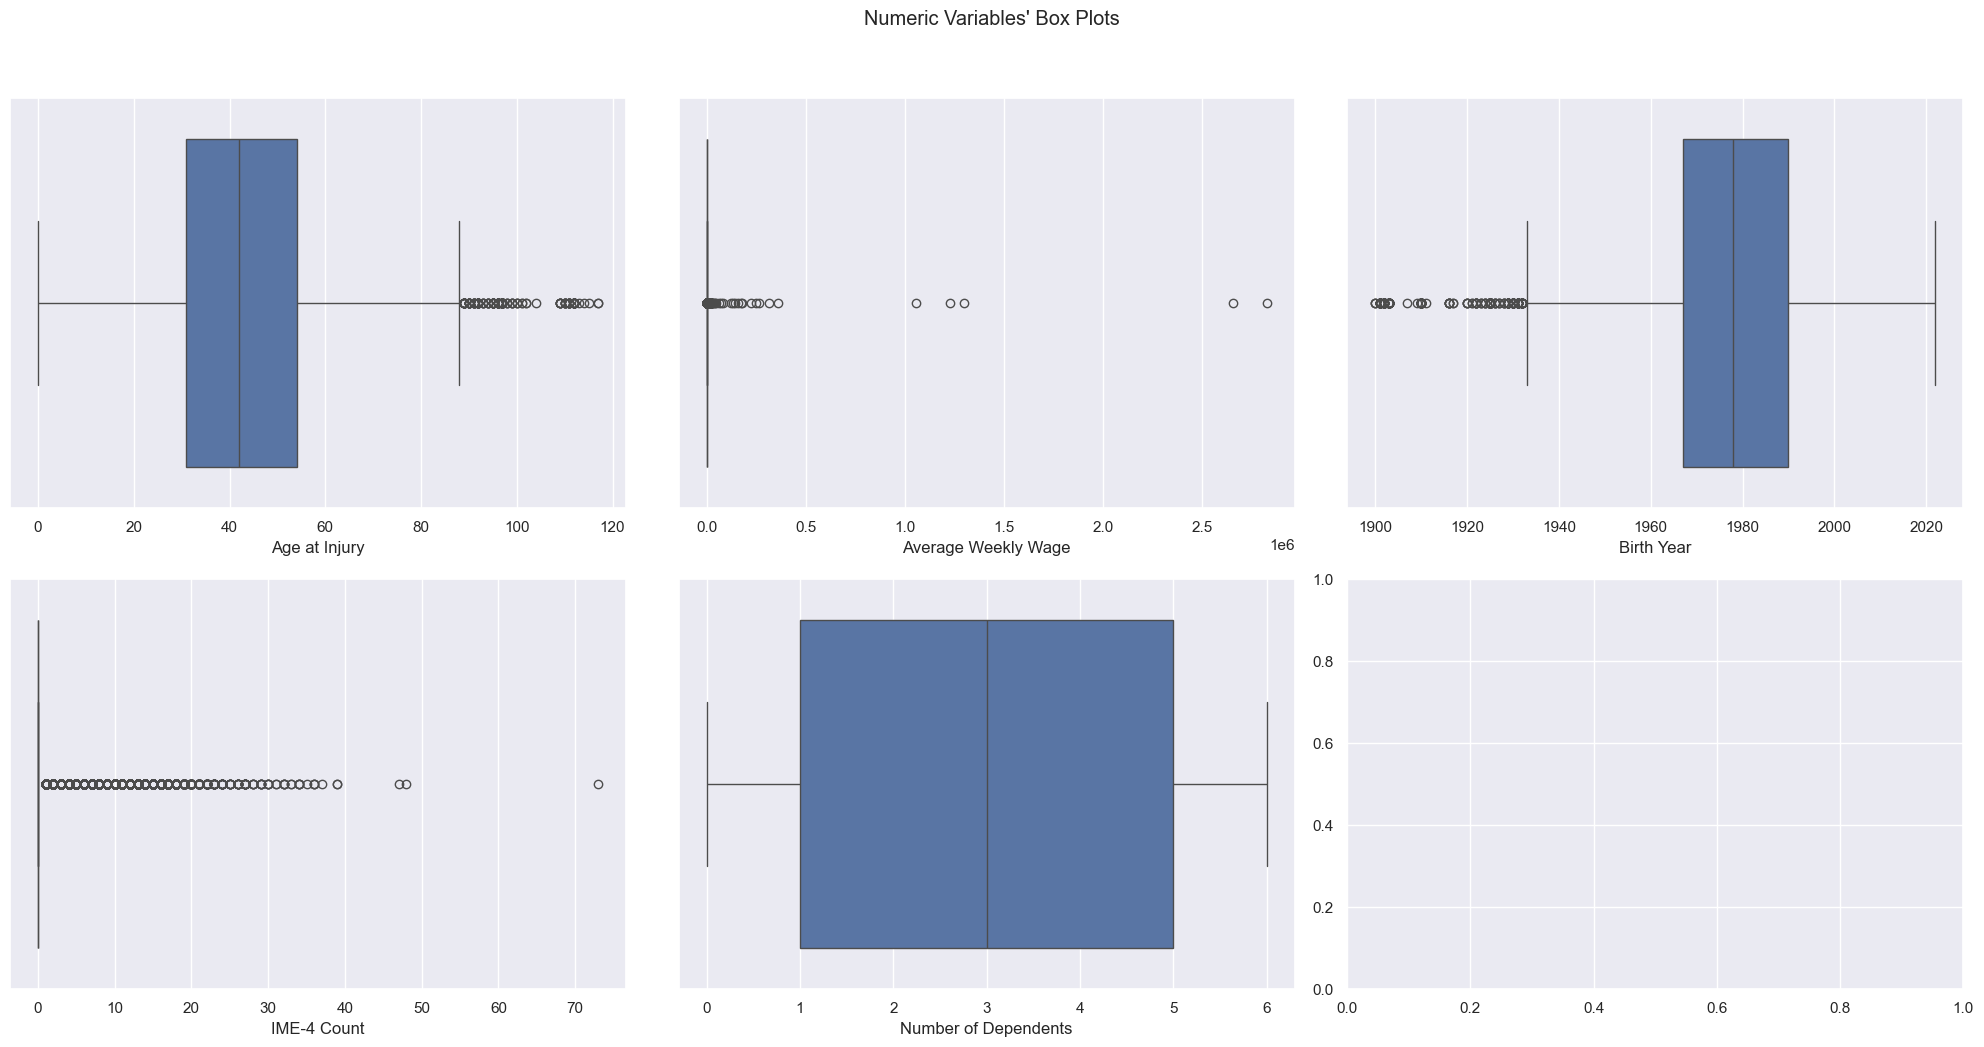

In [58]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_cols.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numeric_cols.columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=numeric_cols[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

Age at injury: all good

Average Weekly Wage: very strange

Birth Year: value 0 is a outlier, going to drop it

Agreement reach: just 0 or 1 values, no outliers

Number of dependents: all good

o que fazer com o Bith Year = 0?

In [59]:
(train['Birth Year'] == 0).sum()

0

1/3 are non-voluntary, so the majority is voluntary

Decided to consider outlier just the outliers of the non-voluntary workers, using the formula below

In [60]:
# Function to calculate IQR and identify outliers for a specific column
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

Age at Injury and Birth Year

In [61]:
outliers_train = identify_outliers_iqr_column(train, 'Age at Injury')
outliers_aligned_train = outliers_train.reindex(train.index, fill_value=False)
print(f"Number of outliers in 'Age at Injury': {outliers_train.sum()}")
train_data_cleaned_age = train[~outliers_aligned_train]

outliers_train = identify_outliers_iqr_column(train_data_cleaned_age, 'Birth Year')
outliers_aligned_train = outliers_train.reindex(train_data_cleaned_age.index, fill_value=False)
print(f"Number of outliers in 'Birth Year': {outliers_train.sum()}")
train_data_cleaned_birth = train_data_cleaned_age[~outliers_aligned_train]

Number of outliers in 'Age at Injury': 195
Number of outliers in 'Birth Year': 149


Average Weekly Wage

In [62]:
not_voluntary_train = train_data_cleaned_birth[train_data_cleaned_birth['Average Weekly Wage'] != 0]

In [63]:
# Identify outliers for the 'Average Weekly Wage' column
outliers_train = identify_outliers_iqr_column(not_voluntary_train, 'Average Weekly Wage')

# Align the index of the outliers Series with X_train_num
outliers_aligned_train = outliers_train.reindex(train_data_cleaned_birth.index, fill_value=False)

# Print the number of outliers in the 'Average Weekly Wage' column
print(f"Number of outliers in 'Average Weekly Wage': {outliers_train.sum()}")

# Remove outliers from the 'Average Weekly Wage' column
train_data_cleaned = train_data_cleaned_birth[~outliers_aligned_train]

# Verify the cleaned DataFrame
print(train.shape)
print("Shape after removing outliers:", train_data_cleaned.shape)

Number of outliers in 'Average Weekly Wage': 5992
(558427, 39)
Shape after removing outliers: (552091, 39)


In [64]:
""" sns.set()
columns_to_plot = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'District Name', 'Gender', 'Industry Code', 'Medical Fee Region', 'Zip Code']

for i in columns_to_plot:
    if i in X_train_cat.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X_train_cat[i].value_counts().index, y=X_train_cat[i].value_counts().values)
        plt.title(f'Bar Plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{i}' does not exist in the DataFrame.") """

' sns.set()\ncolumns_to_plot = [\'Alternative Dispute Resolution\', \'Attorney/Representative\', \'Carrier Type\', \'District Name\', \'Gender\', \'Industry Code\', \'Medical Fee Region\', \'Zip Code\']\n\nfor i in columns_to_plot:\n    if i in X_train_cat.columns:\n        plt.figure(figsize=(10, 6))\n        sns.barplot(x=X_train_cat[i].value_counts().index, y=X_train_cat[i].value_counts().values)\n        plt.title(f\'Bar Plot of {i}\')\n        plt.xlabel(i)\n        plt.ylabel(\'Frequency\')\n        plt.show()\n    else:\n        print(f"Column \'{i}\' does not exist in the DataFrame.") '

<hr>
<a class="anchor" id="datapartition">
    
## 4.5 Data Partition
    
</a>

In [65]:
X = train_data_cleaned.drop(['Claim Injury Type'], axis = 1)
y = train_data_cleaned['Claim Injury Type']

# X_train, X_val, y_train, y_val = train_test_split(X,y, 
#                                                   test_size = 0.3, 
#                                                   random_state = 0, 
#                                                   stratify = y, 
#                                                   shuffle = True)

### Rafa
X_train, X_val,y_train, y_val = train_test_split(X,y,
                                                train_size = 0.7,
                                                random_state=0,
                                                shuffle = True, 
                                                stratify = y)

# For train
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

# For Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# For test
X_test_num = test.select_dtypes(include=np.number).set_index(test.index)
X_test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)

### Categorical Columns as Numerical

In [66]:
# Convert all categorical columns to strings
X_train_cat = X_train_cat.astype(str)
X_val_cat = X_val_cat.astype(str)
X_test_cat = X_test_cat.astype(str)

enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat_lab = enc1.fit_transform(X_train_cat)
X_val_cat_lab = enc1.transform(X_val_cat)
X_test_cat_lab = enc1.transform(X_test_cat)
X_train_cat_lab

array([[0.000e+00, 0.000e+00, 1.027e+03, ..., 2.000e+01, 2.200e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 7.640e+02, ..., 5.500e+01, 5.200e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.610e+03, ..., 9.000e+00, 1.100e+01,
        0.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 1.610e+03, ..., 2.500e+01, 3.900e+01,
        0.000e+00],
       [0.000e+00, 1.000e+00, 6.800e+01, ..., 2.900e+01, 2.300e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.240e+03, ..., 4.600e+01, 2.600e+01,
        2.000e+00]])

In [67]:
X_train_cat_df = pd.DataFrame(X_train_cat_lab, columns=X_train_cat.columns, index=X_train_cat.index)
X_train_cat_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,
6051879,0.0,0.0,1027.0,0.0,14.0,0.0,2.0,1.0,5.0,10.0,0.0,36.0,35.0,24.0,50.0,20.0,22.0,0.0
5801703,0.0,0.0,764.0,0.0,2.0,1.0,4.0,1.0,21.0,0.0,3.0,60.0,51.0,53.0,17.0,55.0,52.0,0.0
5636907,0.0,0.0,1610.0,1.0,0.0,0.0,0.0,1.0,19.0,7.0,1.0,50.0,22.0,1.0,16.0,9.0,11.0,0.0
5748811,0.0,0.0,286.0,0.0,12.0,0.0,1.0,1.0,4.0,10.0,0.0,59.0,1.0,39.0,19.0,22.0,15.0,1.0
5546334,0.0,1.0,935.0,0.0,40.0,0.0,4.0,0.0,7.0,20.0,3.0,31.0,39.0,24.0,50.0,25.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563303,0.0,1.0,85.0,0.0,5.0,0.0,7.0,1.0,10.0,17.0,0.0,17.0,47.0,25.0,51.0,53.0,29.0,0.0
5493106,0.0,0.0,1129.0,0.0,33.0,0.0,7.0,1.0,8.0,16.0,0.0,10.0,16.0,18.0,33.0,40.0,20.0,0.0
5845003,0.0,1.0,1610.0,1.0,35.0,0.0,0.0,0.0,23.0,14.0,1.0,36.0,35.0,25.0,51.0,25.0,39.0,0.0


In [68]:
X_val_cat_df = pd.DataFrame(X_val_cat_lab, columns=X_val_cat.columns, index=X_val_cat.index)
X_val_cat_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,
5428215,0.0,0.0,935.0,0.0,40.0,0.0,4.0,1.0,11.0,17.0,3.0,37.0,54.0,25.0,51.0,19.0,9.0,0.0
5941664,0.0,0.0,83.0,0.0,51.0,0.0,3.0,1.0,3.0,4.0,3.0,68.0,50.0,11.0,27.0,3.0,8.0,0.0
5667757,0.0,0.0,842.0,0.0,40.0,0.0,4.0,0.0,7.0,20.0,3.0,4.0,4.0,18.0,33.0,22.0,15.0,0.0
5991083,0.0,0.0,1610.0,1.0,43.0,0.0,4.0,0.0,19.0,7.0,2.0,50.0,22.0,1.0,16.0,46.0,28.0,0.0
5540150,0.0,0.0,764.0,0.0,41.0,0.0,0.0,1.0,5.0,10.0,1.0,4.0,4.0,5.0,5.0,23.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425952,0.0,0.0,584.0,0.0,40.0,0.0,4.0,1.0,3.0,4.0,3.0,7.0,30.0,18.0,33.0,23.0,12.0,0.0
5807574,0.0,0.0,842.0,0.0,40.0,0.0,4.0,0.0,8.0,16.0,3.0,58.0,66.0,15.0,32.0,4.0,10.0,0.0
5988879,0.0,0.0,933.0,0.0,56.0,0.0,4.0,1.0,3.0,4.0,4.0,10.0,16.0,18.0,33.0,23.0,12.0,2.0


In [69]:
X_test_cat_df = pd.DataFrame(X_test_cat_lab, columns=X_test_cat.columns, index=X_test_cat.index)
X_test_cat_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,
6165911,0.0,0.0,843.0,0.0,2.0,0.0,4.0,1.0,10.0,17.0,3.0,20.0,20.0,1.0,16.0,41.0,24.0,0.0
6166141,0.0,0.0,1.0,0.0,40.0,0.0,4.0,0.0,9.0,16.0,3.0,51.0,21.0,1.0,16.0,0.0,30.0,0.0
6165907,0.0,0.0,72.0,0.0,60.0,0.0,4.0,0.0,17.0,1.0,2.0,46.0,61.0,24.0,50.0,48.0,5.0,0.0
6166047,0.0,0.0,842.0,0.0,40.0,0.0,4.0,0.0,10.0,17.0,3.0,13.0,25.0,1.0,16.0,40.0,20.0,0.0
6166102,0.0,0.0,1129.0,0.0,23.0,0.0,4.0,1.0,16.0,9.0,3.0,55.0,43.0,18.0,33.0,24.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,0.0,0.0,1610.0,1.0,22.0,0.0,7.0,1.0,24.0,19.0,0.0,77.0,71.0,56.0,53.0,56.0,50.0,0.0
6553119,0.0,1.0,1216.0,2.0,51.0,0.0,3.0,0.0,24.0,19.0,3.0,77.0,71.0,56.0,53.0,56.0,50.0,0.0
6553542,0.0,1.0,1610.0,1.0,40.0,0.0,4.0,1.0,24.0,19.0,3.0,77.0,71.0,56.0,53.0,56.0,50.0,0.0


In [70]:
enc2 = LabelEncoder() #encoder for labels
y_train = enc2.fit_transform(y_train)
y_val = enc2.transform(y_val)

In [71]:
y_train, y_val

(array([2, 1, 1, ..., 3, 3, 1]), array([3, 0, 1, ..., 1, 2, 1]))

<hr>
<a class="anchor" id="scaling">
    
## Scaling
    
</a>

In [72]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, index=X_train_num.index, columns=X_train_num.columns)
X_train_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,C-3 Date_dayofweek,C-3 Date_month,C-3 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Claim Identifier,,,,,,,,,,,,,,,,,,,,
6051879,0.477273,0.000000,0.516854,0.000000,0.000000,0.500000,0.545455,0.980769,0.333333,0.636364,1.0,0.333333,0.636364,0.928571,0.333333,0.545455,0.785714,0.50,0.181818,0.50
5801703,0.272727,0.000000,0.707865,0.000000,0.333333,0.666667,0.545455,0.961538,0.166667,0.636364,0.5,0.166667,0.636364,0.892857,0.333333,0.545455,0.785714,0.50,0.181818,0.50
5636907,0.647727,0.000000,0.337079,0.000000,0.666667,0.500000,0.545455,0.942308,0.500000,0.000000,0.5,0.500000,0.000000,0.892857,0.333333,0.545455,0.785714,0.50,0.181818,0.50
5748811,0.636364,0.000000,0.359551,0.000000,0.000000,0.000000,0.454545,0.961538,0.000000,0.454545,0.5,0.833333,0.454545,0.892857,0.333333,0.545455,0.785714,0.50,0.181818,0.50
5546334,0.352273,0.182342,0.629213,0.054795,0.500000,0.333333,0.636364,0.942308,0.666667,0.636364,0.0,0.000000,0.636364,0.857143,0.166667,0.636364,0.714286,0.75,0.454545,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563303,0.715909,0.429786,0.269663,0.054795,0.166667,0.500000,0.727273,0.942308,0.166667,0.727273,0.0,0.166667,0.727273,0.857143,0.666667,1.000000,0.714286,1.00,0.545455,0.50
5493106,0.227273,0.000000,0.752809,0.000000,0.000000,0.666667,0.363636,0.942308,0.500000,0.454545,0.0,0.333333,0.454545,0.857143,0.333333,0.545455,0.785714,0.50,0.181818,0.50
5845003,0.386364,0.715775,0.606742,0.027397,0.000000,0.666667,0.818182,0.961538,0.500000,0.818182,0.5,0.500000,0.818182,0.892857,0.333333,0.545455,0.785714,0.50,0.272727,0.75


In [73]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, index=X_val_num.index, columns=X_val_num.columns)
X_val_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,C-3 Date_dayofweek,C-3 Date_month,C-3 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Claim Identifier,,,,,,,,,,,,,,,,,,,,
5428215,0.500000,0.000000,0.247191,0.000000,0.166667,0.666667,0.545455,0.538462,0.500000,0.090909,0.0,0.500000,0.090909,0.857143,0.333333,0.545455,0.785714,0.5,0.181818,0.5
5941664,0.647727,0.000000,0.303371,0.000000,0.833333,0.166667,0.909091,0.884615,0.666667,0.181818,1.0,0.666667,0.181818,0.928571,0.333333,0.545455,0.785714,0.5,0.181818,0.5
5667757,0.613636,0.000000,0.370787,0.000000,0.666667,0.666667,0.727273,0.942308,0.500000,0.090909,0.5,0.500000,0.090909,0.892857,0.333333,0.545455,0.785714,0.5,0.181818,0.5
5991083,0.386364,0.000000,0.606742,0.000000,1.000000,1.000000,0.363636,0.980769,0.666667,0.363636,1.0,0.666667,0.363636,0.928571,0.333333,0.545455,0.785714,0.5,0.181818,0.5
5540150,0.534091,0.230743,0.449438,0.000000,0.333333,0.500000,0.636364,0.942308,0.166667,0.636364,0.0,0.166667,0.636364,0.857143,0.333333,0.545455,0.785714,0.5,0.181818,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425952,0.363636,0.000000,0.617978,0.000000,0.833333,0.833333,0.090909,0.942308,0.000000,0.090909,0.0,0.000000,0.090909,0.857143,0.333333,0.545455,0.785714,0.5,0.181818,0.5
5807574,0.590909,0.000000,0.393258,0.000000,0.500000,0.500000,0.727273,0.961538,0.500000,0.727273,0.5,0.500000,0.727273,0.892857,0.333333,0.545455,0.785714,0.5,0.181818,0.5
5988879,0.409091,0.000000,0.595506,0.000000,0.666667,0.833333,0.363636,0.980769,0.333333,0.363636,1.0,0.333333,0.363636,0.928571,0.333333,0.545455,0.785714,0.5,0.181818,0.5


In [74]:
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, index=X_test_num.index, columns=X_test_num.columns)
X_test_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,C-3 Date_dayofweek,C-3 Date_month,C-3 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Claim Identifier,,,,,,,,,,,,,,,,,,,,
6165911,0.215909,0.0,0.786517,0.0,0.166667,0.833333,1.000000,0.980769,0.000000,0.000000,1.5,0.000000,0.000000,0.964286,0.333333,0.545455,0.785714,0.5,0.181818,0.5
6166141,0.215909,0.0,0.786517,0.0,0.166667,1.000000,0.909091,0.980769,0.000000,0.000000,1.5,0.000000,0.000000,0.964286,0.333333,0.545455,0.785714,0.5,0.181818,0.5
6165907,0.670455,0.0,0.337079,0.0,0.000000,0.000000,1.000000,0.980769,0.000000,0.000000,1.5,0.833333,1.000000,0.928571,0.333333,0.545455,0.785714,0.5,0.181818,0.5
6166047,0.625000,0.0,0.382022,0.0,1.000000,0.333333,1.000000,0.980769,0.000000,0.000000,1.5,0.000000,0.000000,0.964286,0.333333,0.545455,0.785714,0.5,0.181818,0.5
6166102,0.284091,0.0,0.719101,0.0,0.833333,0.166667,1.000000,0.980769,0.000000,0.000000,1.5,0.833333,1.000000,0.928571,0.333333,0.545455,0.785714,0.5,0.181818,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,0.590909,0.0,0.303371,0.0,0.833333,0.333333,0.727273,0.788462,0.333333,0.454545,2.0,0.166667,0.818182,0.571429,0.333333,0.545455,0.785714,0.5,0.181818,0.5
6553119,0.670455,0.0,0.359551,0.0,0.166667,0.333333,0.363636,1.019231,0.333333,0.454545,2.0,0.000000,0.636364,0.892857,0.166667,0.363636,1.000000,0.5,0.181818,0.5
6553542,0.511364,0.0,0.516854,0.0,0.833333,0.000000,0.363636,1.019231,0.333333,0.454545,2.0,0.000000,0.636364,0.892857,0.333333,0.545455,0.785714,0.5,0.181818,0.5


<hr>
<a class="anchor" id="featureselection">
    
# 5. Feature selection
    
</a>

In [75]:
X_train_num_scaled.var()

Age at Injury                   0.025367
Average Weekly Wage             0.051864
Birth Year                      0.024445
IME-4 Count                     0.000702
Number of Dependents            0.111293
Accident Date_dayofweek         0.092251
Accident Date_month             0.098927
Accident Date_year              0.001034
Assembly Date_dayofweek         0.057504
Assembly Date_month             0.098052
Assembly Date_year              0.163874
C-2 Date_dayofweek              0.060283
C-2 Date_month                  0.098140
C-2 Date_year                   0.001403
C-3 Date_dayofweek              0.019592
C-3 Date_month                  0.031298
C-3 Date_year                   0.001266
First Hearing Date_dayofweek    0.034801
First Hearing Date_month        0.046296
First Hearing Date_year         0.019586
dtype: float64

In [76]:
#X_train_num_scaled.drop('IME-4 Count', axis=1, inplace=True)
#X_val_num_scaled.drop('IME-4 Count', axis=1, inplace=True)
#X_test_num_scaled.drop('IME-4 Count', axis=1, inplace=True)

X_train_num_scaled.drop('Accident Date_year', axis=1, inplace=True)
X_val_num_scaled.drop('Accident Date_year', axis=1, inplace=True)
X_test_num_scaled.drop('Accident Date_year', axis=1, inplace=True)

X_train_num_scaled.drop('C-2 Date_year', axis=1, inplace=True)
X_val_num_scaled.drop('C-2 Date_year', axis=1, inplace=True)
X_test_num_scaled.drop('C-2 Date_year', axis=1, inplace=True)

In [77]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [78]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman #Age at Injury and Birth Year are highly correlated, what make a lot of sense, it is the same information, we should delete one of them (Birth Year)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-3 Date_dayofweek,C-3 Date_month,C-3 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Age at Injury,1.000000,0.118587,-0.980841,0.128126,-0.000556,-0.051707,-0.021609,0.004795,-0.016198,-0.013778,0.003831,-0.014570,-0.003007,-0.017112,0.012723,0.000479,0.067911,-0.021821
Average Weekly Wage,0.118587,1.000000,-0.109591,0.554556,-0.000383,-0.006184,-0.012630,0.003076,-0.010072,-0.037766,0.008435,-0.011577,-0.006553,-0.041950,0.017258,-0.003280,0.285453,-0.069463
Birth Year,-0.980841,-0.109591,1.000000,-0.125396,0.000273,0.037868,0.035797,-0.005749,0.035315,0.072260,-0.003911,0.033072,0.003482,0.024126,0.020341,0.000137,-0.074984,0.048577
IME-4 Count,0.128126,0.554556,-0.125396,1.000000,0.001083,-0.004271,-0.006431,0.003565,-0.007510,-0.040134,0.011162,-0.007809,-0.008992,-0.041520,0.028848,-0.005858,0.376255,-0.125203
Number of Dependents,-0.000556,-0.000383,0.000273,0.001083,1.000000,0.000109,-0.003818,-0.003046,-0.001565,0.001591,-0.001132,-0.001576,-0.000168,-0.000986,-0.001833,0.002454,0.000153,0.000047
Accident Date_dayofweek,-0.051707,-0.006184,0.037868,-0.004271,0.000109,1.000000,-0.009766,-0.043055,0.001025,-0.008520,-0.050498,0.001263,-0.009773,-0.003226,-0.006542,-0.001481,0.006917,-0.005743
Accident Date_month,-0.021609,-0.012630,0.035797,-0.006431,-0.003818,-0.009766,1.000000,-0.018413,0.702056,0.010375,-0.010407,0.675746,-0.006560,0.269107,0.018525,0.001054,-0.059767,0.085431
Assembly Date_dayofweek,0.004795,0.003076,-0.005749,0.003565,-0.003046,-0.043055,-0.018413,1.000000,-0.021127,-0.004592,0.636321,-0.018286,-0.020448,-0.008463,0.002039,0.002231,0.002137,-0.000989
Assembly Date_month,-0.016198,-0.010072,0.035315,-0.007510,-0.001565,0.001025,0.702056,-0.021127,1.000000,0.011614,-0.009771,0.943770,-0.006928,0.374746,0.031938,0.001317,-0.069066,0.118137
Assembly Date_year,-0.013778,-0.037766,0.072260,-0.040134,0.001591,-0.008520,0.010375,-0.004592,0.011614,1.000000,0.012894,0.019181,0.004988,-0.010831,0.521646,0.011799,-0.043061,0.371043


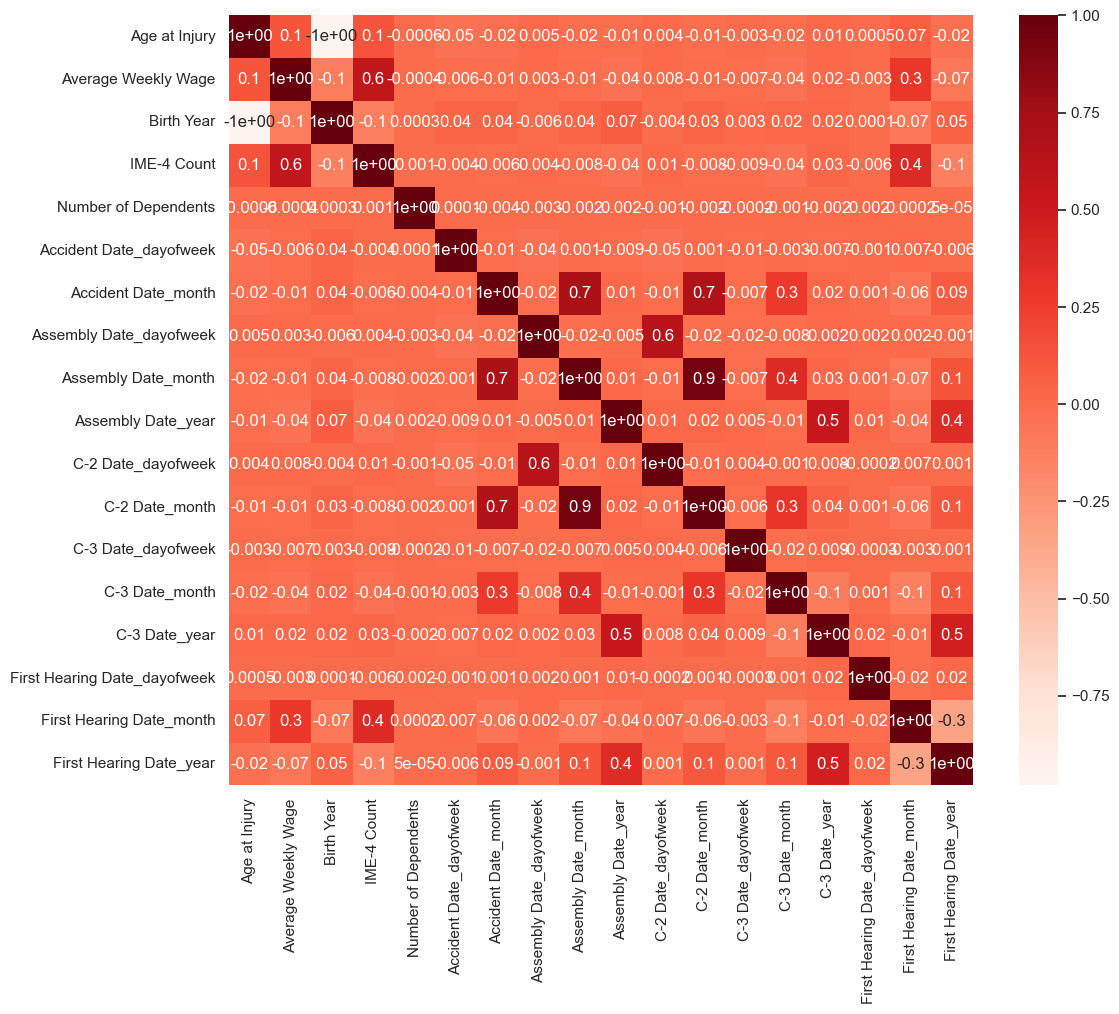

In [79]:
cor_heatmap(cor_spearman)

In [80]:
X_train_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_val_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_test_num_scaled.drop('Birth Year', axis=1, inplace=True)

X_train_num_scaled.drop('Assembly Date_month', axis=1, inplace=True)
X_val_num_scaled.drop('Assembly Date_month', axis=1, inplace=True)
X_test_num_scaled.drop('Assembly Date_month', axis=1, inplace=True)

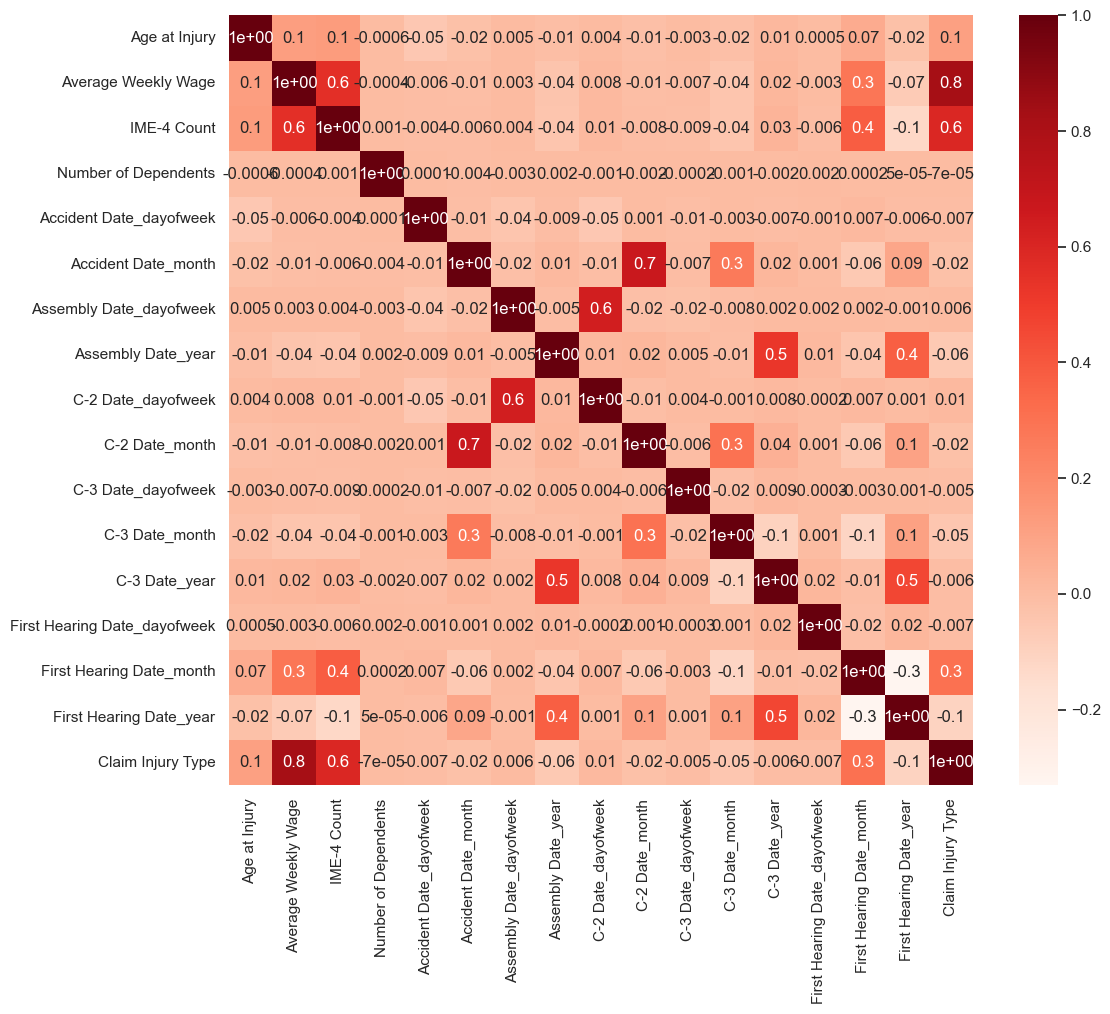

In [81]:
# Caso as formas sejam compatíveis, combine as variáveis
X_train_num_scaled_y = X_train_num_scaled.copy()
X_train_num_scaled_y['Claim Injury Type'] = y_train

# Calcule a correlação de Spearman
cor_spearman_y = X_train_num_scaled_y.corr(method='spearman')

# Crie o heatmap da correlação
cor_heatmap(cor_spearman_y)

In [82]:
X_train_num_scaled.drop(['Number of Dependents', 'Accident Date_dayofweek', 'Assembly Date_dayofweek', 'First Hearing Date_dayofweek'], axis=1, inplace=True)
X_val_num_scaled.drop(['Number of Dependents', 'Accident Date_dayofweek', 'Assembly Date_dayofweek', 'First Hearing Date_dayofweek'], axis=1, inplace=True)
X_test_num_scaled.drop(['Number of Dependents', 'Accident Date_dayofweek', 'Assembly Date_dayofweek', 'First Hearing Date_dayofweek'], axis=1, inplace=True)

In [83]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [84]:
for var in X_train_cat_df:
    TestIndependence(X_train_cat_df[var],y_train, var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction


In [85]:
X_train_combined = pd.concat([X_train_num_scaled, X_train_cat_df], axis=1)
X_val_combined = pd.concat([X_val_num_scaled, X_val_cat_df], axis=1)
X_test_combined = pd.concat([X_test_num_scaled, X_test_cat_df], axis=1)

In [86]:
X_train_num_scaled.shape, X_train_cat_df.shape, X_train_combined.shape

((386463, 12), (386463, 18), (386463, 30))

In [87]:
""" # Lista de número de features a serem testadas
nof_list = np.arange(1, X_train_combined.shape[1]+1)
high_score = 0
nof = 0  # Número ótimo de features
train_score_list = []
val_score_list = []

# Loop para selecionar o número ótimo de features
for n in nof_list:
    model = LogisticRegression(max_iter=3000, solver='saga')
    rfe = RFE(estimator=model, n_features_to_select=n)
    
    # Aplicar o RFE nos dados de treino
    X_train_rfe = rfe.fit_transform(X_train_combined, y_train)
    X_val_rfe = rfe.transform(X_val_combined)
    
    # Treinar o modelo
    model.fit(X_train_rfe, y_train)
    
    # Armazenar os resultados de treino e validação
    train_score = model.score(X_train_rfe, y_train)
    train_score_list.append(train_score)
    
    val_score = model.score(X_val_rfe, y_val)
    val_score_list.append(val_score)
    
    # Atualizar o melhor score, se necessário
    if val_score > high_score:
        high_score = val_score
        nof = n

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score)) """

' # Lista de número de features a serem testadas\nnof_list = np.arange(1, X_train_combined.shape[1]+1)\nhigh_score = 0\nnof = 0  # Número ótimo de features\ntrain_score_list = []\nval_score_list = []\n\n# Loop para selecionar o número ótimo de features\nfor n in nof_list:\n    model = LogisticRegression(max_iter=3000, solver=\'saga\')\n    rfe = RFE(estimator=model, n_features_to_select=n)\n    \n    # Aplicar o RFE nos dados de treino\n    X_train_rfe = rfe.fit_transform(X_train_combined, y_train)\n    X_val_rfe = rfe.transform(X_val_combined)\n    \n    # Treinar o modelo\n    model.fit(X_train_rfe, y_train)\n    \n    # Armazenar os resultados de treino e validação\n    train_score = model.score(X_train_rfe, y_train)\n    train_score_list.append(train_score)\n    \n    val_score = model.score(X_val_rfe, y_val)\n    val_score_list.append(val_score)\n    \n    # Atualizar o melhor score, se necessário\n    if val_score > high_score:\n        high_score = val_score\n        nof = n\n\n

In [88]:
""" model = LogisticRegression(max_iter=300, solver='saga')
rfe = RFE(estimator = model, n_features_to_select = 1)
X_rfe = rfe.fit_transform(X = X_train_combined, y = y_train)
X_train_num_scaled.columns """

" model = LogisticRegression(max_iter=300, solver='saga')\nrfe = RFE(estimator = model, n_features_to_select = 1)\nX_rfe = rfe.fit_transform(X = X_train_combined, y = y_train)\nX_train_num_scaled.columns "

In [89]:
""" rfe.support_ """

' rfe.support_ '

In [90]:
""" rfe.ranking_ """

' rfe.ranking_ '

In [91]:
""" selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features """

' selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)\nselected_features '

In [92]:
""" plt.plot(list(range(1, len(train_score_list) + 1)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1, len(val_score_list) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.legend()
plt.show() """

' plt.plot(list(range(1, len(train_score_list) + 1)), train_score_list, label="Score on Training Set", color=\'yellowgreen\')\nplt.plot(list(range(1, len(val_score_list) + 1)), val_score_list, label="Score on Test Set", color=\'dimgray\')\nplt.xlabel("Number of Features")\nplt.ylabel("Score")\nplt.legend()\nplt.show() '

In [93]:
#######################

In [94]:
""" #no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}") """

' #no of features\nnof_list=np.arange(1,13)            \nhigh_score=0\n#Variable to store the optimum features\nnof=0           \ntrain_score_list =[]\nval_score_list = []\n\nfor n in range(len(nof_list)):\n    #call support vector machines classifier\n    model = SVC(kernel = \'linear\')\n    \n    #create RFE instance\n    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])\n    \n    #fit and transform for training data, transform for val data\n    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)\n    X_val_rfe = rfe.transform(X_val_num_scaled)\n    \n    model.fit(X_train_rfe,y_train)\n    \n    #storing results on training data\n    train_score = model.score(X_train_rfe,y_train)\n    train_score_list.append(train_score)\n    \n    #storing results on training data\n    val_score = model.score(X_val_rfe,y_val)\n    val_score_list.append(val_score)\n    \n    #check best score\n    if(val_score > high_score):\n        high_score = val_score\n        nof = nof_

In [95]:
""" plt.plot(list(range(1, len(train_score_list) + 1)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1, len(val_score_list) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show() """

' plt.plot(list(range(1, len(train_score_list) + 1)), train_score_list, label="Score on Training Set", color=\'yellowgreen\')\nplt.plot(list(range(1, len(val_score_list) + 1)), val_score_list, label="Score on Test Set", color=\'dimgray\')\nplt.xlabel("Maximum Depth")\nplt.ylabel("Score")\nplt.legend()\nplt.show() '

In [96]:
##################################

In [97]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [98]:
reg = LassoCV()
reg.fit(X_train_combined, y_train)
coef = pd.Series(reg.coef_, index = X_train_combined.columns)
coef

Age at Injury                        0.000000
Average Weekly Wage                  1.970011
IME-4 Count                          0.000000
Accident Date_month                 -0.000000
Assembly Date_year                  -0.000000
C-2 Date_dayofweek                   0.000000
C-2 Date_month                      -0.000000
C-3 Date_dayofweek                   0.000000
C-3 Date_month                      -0.000000
C-3 Date_year                       -0.000000
First Hearing Date_month             0.000000
First Hearing Date_year             -0.000000
Alternative Dispute Resolution      -0.000000
Attorney/Representative              0.793905
Carrier Name                         0.000044
Carrier Type                        -0.000000
County of Injury                    -0.000276
COVID-19 Indicator                  -0.000000
District Name                        0.000000
Gender                               0.000000
Industry Code                       -0.001428
Industry Code Description         

In [99]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 18 variables


In [100]:
coef.sort_values()

Medical Fee Region                  -0.009114
WCIO Cause of Injury Code           -0.002642
WCIO Nature of Injury Code          -0.002022
Industry Code                       -0.001428
County of Injury                    -0.000276
Age at Injury                        0.000000
Industry Code Description            0.000000
Gender                               0.000000
District Name                        0.000000
COVID-19 Indicator                  -0.000000
Carrier Type                        -0.000000
Alternative Dispute Resolution      -0.000000
Zip Code                            -0.000000
Assembly Date_year                  -0.000000
IME-4 Count                          0.000000
First Hearing Date_month             0.000000
C-3 Date_year                       -0.000000
C-3 Date_month                      -0.000000
C-3 Date_dayofweek                   0.000000
C-2 Date_month                      -0.000000
C-2 Date_dayofweek                   0.000000
First Hearing Date_year           

In [101]:
columns_to_keep = coef[coef != 0].index
columns_to_keep

Index(['Average Weekly Wage', 'Attorney/Representative', 'Carrier Name',
       'County of Injury', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description'],
      dtype='object')

In [102]:
X_train_combined_lasso = X_train_combined[columns_to_keep]
X_val_combined_lasso = X_train_combined[columns_to_keep]
X_test_combined_lasso = X_train_combined[columns_to_keep]

In [103]:
####################################################

In [104]:
""" numberK_list=np.arange(1,X_train_combined.shape[1]+1)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train_combined, y_train)
    score_train = model.score(X_train_combined, y_train)
    score_val = model.score(X_val_combined, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score)) """

' numberK_list=np.arange(1,X_train_combined.shape[1]+1)\nhigh_score=0\nnof=0           \nscore_list_train =[]\nscore_list_val =[]\nfor n in numberK_list:\n    model = KNeighborsClassifier(n_neighbors = n).fit(X_train_combined, y_train)\n    score_train = model.score(X_train_combined, y_train)\n    score_val = model.score(X_val_combined, y_val)\n    score_list_train.append(score_train)\n    score_list_val.append(score_val)\n    \n    if(score_val>high_score):\n        high_score = score_val\n        nof = numberK_list[n-1]\nprint("Best number of neighbors: %d" %nof)\nprint("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))\nprint("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score)) '

<hr>
<a class="anchor" id="simplemodel">
    
# 6. Build a simple model and assess the performance
    
</a>

### Creating the model

In [105]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
#loo = LeaveOneOut()

In [106]:
""" print("GaussianNB:")
# Modelo GaussianNB
model = GaussianNB()

# Treinamento e validação utilizando K-Fold
print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Acurácia média (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (K-Fold): {kfold_scores.std():.2f}")

# Treinamento e validação utilizando Repeated K-Fold
print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Acurácia média (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

# Caso queira treinar o modelo no conjunto de treino completo e avaliar com conjunto de validação
# Fit no conjunto de treinamento completo
model.fit(X_train_num_scaled, y_train)

# Previsões no conjunto de validação
y_pred = model.predict(X_val_num_scaled)

# Acurácia no conjunto de validação
accuracy = accuracy_score(y_val, y_pred)
print(f"\nAcurácia no conjunto de validação: {accuracy * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred)) """

' print("GaussianNB:")\n# Modelo GaussianNB\nmodel = GaussianNB()\n\n# Treinamento e validação utilizando K-Fold\nprint("K-Fold Cross Validation:")\nkfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring=\'accuracy\')\nprint(f"Acurácia média (K-Fold): {kfold_scores.mean() * 100:.2f}%")\nprint(f"Desvio padrão (K-Fold): {kfold_scores.std():.2f}")\n\n# Treinamento e validação utilizando Repeated K-Fold\nprint("\nRepeated K-Fold Cross Validation:")\nrepeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring=\'accuracy\')\nprint(f"Acurácia média (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")\nprint(f"Desvio padrão (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")\n\n# Caso queira treinar o modelo no conjunto de treino completo e avaliar com conjunto de validação\n# Fit no conjunto de treinamento completo\nmodel.fit(X_train_num_scaled, y_train)\n\n# Previsões no conjunto de validação\ny_pred = mode

In [107]:
print("DecisionTreeClassifier:")
# Modelo GaussianNB
model = DecisionTreeClassifier()

""" # Treinamento e validação utilizando K-Fold
print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_combined_lasso, y_train, cv=kfold, scoring='accuracy')
print(f"Acurácia média (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (K-Fold): {kfold_scores.std():.2f}")

# Treinamento e validação utilizando Repeated K-Fold
print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_combined_lasso, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Acurácia média (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (Repeated K-Fold): {repeated_kfold_scores.std():.2f}") """

# Caso queira treinar o modelo no conjunto de treino completo e avaliar com conjunto de validação
# Fit no conjunto de treinamento completo
model.fit(X_train_combined, y_train)

# Previsões no conjunto de validação
y_pred = model.predict(X_val_combined)

# Acurácia no conjunto de validação
accuracy = accuracy_score(y_val, y_pred)
print(f"\nAcurácia no conjunto de validação: {accuracy * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred))

DecisionTreeClassifier:

Acurácia no conjunto de validação: 67.48%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.12      0.13      0.12      1636
           1       0.86      0.83      0.85     84809
           2       0.20      0.22      0.21     20356
           3       0.68      0.67      0.67     43485
           4       0.51      0.52      0.51     13946
           5       0.08      0.10      0.09      1234
           6       0.00      0.00      0.00        27
           7       0.19      0.16      0.17       135

    accuracy                           0.67    165628
   macro avg       0.33      0.33      0.33    165628
weighted avg       0.69      0.67      0.68    165628



In [108]:
print("KNeighborsClassifier:")
# Modelo GaussianNB
model = KNeighborsClassifier(n_neighbors=5)

""" # Treinamento e validação utilizando K-Fold
print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Acurácia média (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (K-Fold): {kfold_scores.std():.2f}")

# Treinamento e validação utilizando Repeated K-Fold
print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Acurácia média (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (Repeated K-Fold): {repeated_kfold_scores.std():.2f}") """

# Caso queira treinar o modelo no conjunto de treino completo e avaliar com conjunto de validação
# Fit no conjunto de treinamento completo
model.fit(X_train_combined, y_train)

# Previsões no conjunto de validação
y_pred = model.predict(X_val_combined)

# Acurácia no conjunto de validação
accuracy = accuracy_score(y_val, y_pred)
print(f"\nAcurácia no conjunto de validação: {accuracy * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred))

KNeighborsClassifier:

Acurácia no conjunto de validação: 53.05%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.08      0.03      0.04      1636
           1       0.60      0.80      0.69     84809
           2       0.19      0.09      0.12     20356
           3       0.42      0.32      0.36     43485
           4       0.49      0.27      0.35     13946
           5       0.05      0.00      0.00      1234
           6       0.00      0.00      0.00        27
           7       0.17      0.01      0.03       135

    accuracy                           0.53    165628
   macro avg       0.25      0.19      0.20    165628
weighted avg       0.48      0.53      0.49    165628



c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
""" print("LogisticRegression:")
# Modelo GaussianNB
model = LogisticRegression(class_weight='balanced')

# Treinamento e validação utilizando K-Fold
print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Acurácia média (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (K-Fold): {kfold_scores.std():.2f}")

# Treinamento e validação utilizando Repeated K-Fold
print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Acurácia média (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

# Caso queira treinar o modelo no conjunto de treino completo e avaliar com conjunto de validação
# Fit no conjunto de treinamento completo
model.fit(X_train_num_scaled, y_train)

# Previsões no conjunto de validação
y_pred = model.predict(X_val_num_scaled)

# Acurácia no conjunto de validação
accuracy = accuracy_score(y_val, y_pred)
print(f"\nAcurácia no conjunto de validação: {accuracy * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred)) """

LogisticRegression:
K-Fold Cross Validation:
Acurácia média (K-Fold): 33.57%
Desvio padrão (K-Fold): 0.00

Repeated K-Fold Cross Validation:
Acurácia média (Repeated K-Fold): 33.52%
Desvio padrão (Repeated K-Fold): 0.00

Acurácia no conjunto de validação: 33.63%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.01      0.08      0.02      1636
           1       0.62      0.58      0.60     84813
           2       0.16      0.09      0.12     20625
           3       0.54      0.05      0.09     44448
           4       0.12      0.15      0.13     14474
           5       0.03      0.17      0.05      1262
           6       0.00      0.17      0.00        29
           7       0.01      0.61      0.01       138

    accuracy                           0.34    167425
   macro avg       0.19      0.24      0.13    167425
weighted avg       0.49      0.34      0.35    167425



In [ ]:
""" print("SVC:")
# Modelo GaussianNB
model = SVC(class_weight='balanced')

# Treinamento e validação utilizando K-Fold
print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Acurácia média (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (K-Fold): {kfold_scores.std():.2f}")

# Treinamento e validação utilizando Repeated K-Fold
print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Acurácia média (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Desvio padrão (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

# Caso queira treinar o modelo no conjunto de treino completo e avaliar com conjunto de validação
# Fit no conjunto de treinamento completo
model.fit(X_train_num_scaled, y_train)

# Previsões no conjunto de validação
y_pred = model.predict(X_val_num_scaled)

# Acurácia no conjunto de validação
accuracy = accuracy_score(y_val, y_pred)
print(f"\nAcurácia no conjunto de validação: {accuracy * 100:.2f}%")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred)) """

SVC:
K-Fold Cross Validation:


In [110]:
%pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

def train_model(X_train, y_train, model_type='xgb', random_state=42):
    """Train model with multiple options"""
    print(f"\nTraining {model_type} model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    if model_type == 'xgb':
        model = XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=random_state,
            n_jobs=2,
            tree_method='hist',
            enable_categorical=True,
            objective='multi:softprob',
            num_class=8,
            eval_metric=['mlogloss', 'merror'],
            use_label_encoder=False
        )
        
        # Train with early stopping
        eval_set = [(X_train, y_train)]
        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=True
        )
        
    elif model_type == 'hist_gb':
        model = HistGradientBoostingClassifier(
            max_iter=100,
            learning_rate=0.1,
            max_depth=None,
            random_state=random_state,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    elif model_type == 'simple_rf':
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=random_state,
            n_jobs=2,
            verbose=1,
            class_weight='balanced'
        )
        model.fit(X_train, y_train)
        
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    return model

Note: you may need to restart the kernel to use updated packages.


In [111]:
model = train_model(X_train_combined, y_train)


Training xgb model...
Starting training with 30 features...


c:\Users\lopes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:23:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.84218	validation_0-merror:0.22638
[1]	validation_0-mlogloss:1.67174	validation_0-merror:0.22345
[2]	validation_0-mlogloss:1.53918	validation_0-merror:0.22307
[3]	validation_0-mlogloss:1.43090	validation_0-merror:0.22350
[4]	validation_0-mlogloss:1.34068	validation_0-merror:0.22394
[5]	validation_0-mlogloss:1.26362	validation_0-merror:0.22304
[6]	validation_0-mlogloss:1.19745	validation_0-merror:0.22258
[7]	validation_0-mlogloss:1.13956	validation_0-merror:0.22230
[8]	validation_0-mlogloss:1.08882	validation_0-merror:0.22185
[9]	validation_0-mlogloss:1.04360	validation_0-merror:0.22150
[10]	validation_0-mlogloss:1.00383	validation_0-merror:0.22140
[11]	validation_0-mlogloss:0.96859	validation_0-merror:0.22107
[12]	validation_0-mlogloss:0.93666	validation_0-merror:0.22093
[13]	validation_0-mlogloss:0.90833	validation_0-merror:0.22066
[14]	validation_0-mlogloss:0.88266	validation_0-merror:0.22030
[15]	validation_0-mlogloss:0.85943	validation_0-merror:0.21967
[1

In [112]:
print(model.score(X_train_combined, y_train))
print(model.score(X_val_combined, y_val))

0.7937965600846653
0.7898664477020794


### Evaluate the model

In [113]:
CLAIM_TYPE_MAPPING = {
    1: '1. CANCELLED',
    2: '2. NON-COMP',
    3: '3. MED ONLY',
    4: '4. TEMPORARY',
    5: '5. PPD SCH LOSS',
    6: '6. PPD NSL',
    7: '7. PTD',
    8: '8. DEATH'
    }

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def evaluate_model(model, X_val, y_val, X_test=None):
    y_val_pred = model.predict(X_val)
    
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'f1_macro': f1_score(y_val, y_val_pred, average='macro')
    }
    
    print("\nValidation Results:")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\nMetrics:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    test_pred = None
    if X_test is not None:
        test_pred = model.predict(X_test)
    
    return val_metrics, test_pred
    
val_metrics, test_pred = evaluate_model(model, X_val_combined, y_val, X_train_combined)


Validation Results:

Classification Report:


c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lopes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.49      0.03      0.05      1636
           1       0.85      0.99      0.91     84809
           2       0.50      0.06      0.11     20356
           3       0.72      0.87      0.79     43485
           4       0.70      0.58      0.63     13946
           5       0.50      0.00      0.00      1234
           6       0.00      0.00      0.00        27
           7       0.61      0.20      0.30       135

    accuracy                           0.79    165628
   macro avg       0.55      0.34      0.35    165628
weighted avg       0.75      0.79      0.74    165628


Metrics:
accuracy: 0.7899
f1_macro: 0.3497


### Export the predictor

In [ ]:
def create_submission_df(predictions, test_df):
    # Add 1 to predictions to convert back to original scale (0-7 to 1-8)
    numeric_predictions = predictions + 1
    
    # Map numeric predictions to claim type strings
    claim_types = [CLAIM_TYPE_MAPPING[pred] for pred in numeric_predictions]
    
    # Create submission dataframe using original (unscaled) claim identifiers
    submission = pd.DataFrame({
        'Claim Identifier': test_df['Claim Identifier'].astype(int),  # Original claim IDs
        'Claim Injury Type': claim_types  # Full claim type names
    })
    
    return submission

In [ ]:
def save_submission(submission_df, experiment_name):
    filename = f'submission_{experiment_name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"\nSubmission saved to {filename}")
    
    # Display sample of submission
    print("\nSubmission sample:")
    print(submission_df.head())
    print("\nValue counts:")
    print(submission_df['Claim Injury Type'].value_counts())

In [ ]:
""" model_1 = 'Model new'
original_claim_ids = X_test_combined.index.copy()
submission_df = create_submission_df(test_pred, pd.DataFrame({'Claim Identifier': original_claim_ids}))
save_submission(submission_df, model_1) """

" model_1 = 'Model new'\noriginal_claim_ids = X_test_combined.index.copy()\nsubmission_df = create_submission_df(test_pred, pd.DataFrame({'Claim Identifier': original_claim_ids}))\nsave_submission(submission_df, model_1) "